In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [118]:
# Define the stock ticker
ticker = 'BEPL.NS'

In [119]:
# Fetch data from Yahoo Finance
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [120]:
# Ensure we are working on a copy to avoid SettingWithCopyWarning
data = data[['Adj Close']].copy()

In [121]:
# Calculate the 20-day SMA and 50-day SMA
data['SMA 20'] = data['Adj Close'].rolling(window=20).mean()
data['SMA 50'] = data['Adj Close'].rolling(window=50).mean()

In [122]:
# Calculate the 20-day EMA and 50-day EMA
data['EMA 20'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
data['EMA 50'] = data['Adj Close'].ewm(span=50, adjust=False).mean()

In [123]:
print(data.head())

            Adj Close  SMA 20  SMA 50     EMA 20     EMA 50
Date                                                       
2020-01-01  28.709179     NaN     NaN  28.709179  28.709179
2020-01-02  29.182562     NaN     NaN  28.754263  28.727743
2020-01-03  28.709179     NaN     NaN  28.749969  28.727015
2020-01-06  26.592886     NaN     NaN  28.544533  28.643324
2020-01-07  27.456110     NaN     NaN  28.440873  28.596766


In [124]:
# Initialize the 'Signal' column
data['Signal'] = 0

In [125]:
# Generate buy and sell signals using .loc to avoid SettingWithCopyWarning
data['Signal'] = np.where(data['SMA 20'] > data['SMA 50'], 1, 0)

In [126]:
print(data.head())

            Adj Close  SMA 20  SMA 50     EMA 20     EMA 50  Signal
Date                                                               
2020-01-01  28.709179     NaN     NaN  28.709179  28.709179       0
2020-01-02  29.182562     NaN     NaN  28.754263  28.727743       0
2020-01-03  28.709179     NaN     NaN  28.749969  28.727015       0
2020-01-06  26.592886     NaN     NaN  28.544533  28.643324       0
2020-01-07  27.456110     NaN     NaN  28.440873  28.596766       0


In [127]:
# Create positions based on the signals
data['position'] = data['Signal'].diff()


In [128]:
# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()


In [129]:
# Initialize the Strategy_Return column
data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1)

In [130]:
# Apply commission: subtract 1% from returns on trading days
trade_days = data['position'].abs() == 1
data.loc[trade_days, 'Strategy_Return'] -= 0.01

In [131]:
# Calculate cumulative returns
data['Cumulative_Strategy_Return'] = (1+data['Strategy_Return']).cumprod() -1
data['Cumulative_Market_Return'] = (1+data['Daily_Return']).cumprod() -1


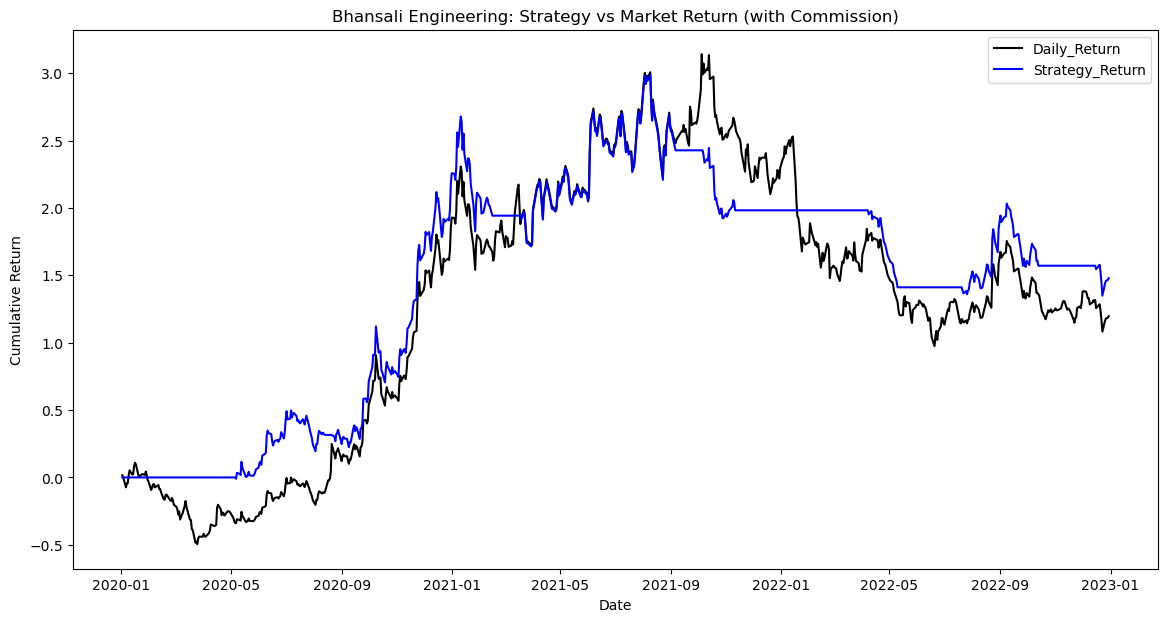

In [133]:
# Plot the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative_Market_Return'], label='Daily_Return', color='black')
plt.plot(data.index, data['Cumulative_Strategy_Return'], label='Strategy_Return', color='blue')
plt.title('Bhansali Engineering: Strategy vs Market Return (with Commission)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()